In [5]:
import pickle
import tensorflow as tf
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras import callbacks, layers, Sequential
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from dataflow import Flow

In [11]:
data1 = Flow(None, None, None, 'csv/preselected_pKmue_moreFeatures_unequalRatio.csv')
data2 = Flow(None, None, None, 'csv/preselected_pKmue_fullFeatures_equalRatio.csv')
data3 = Flow(None, None, None, 'csv/preselected_pKmue_fullFeatures_equalRatio_restrictedSideband.csv')

data = [data1, data2, data3]

In [27]:
custom_callbacks = [
    callbacks.EarlyStopping(patience=20, min_delta=0.0005, restore_best_weights=True), 
    callbacks.ReduceLROnPlateau(patience=5, factor=0.2, min_lr=0.001)
    ]

def compile_model(input_shape):
    model = Sequential([
        layers.Dense(16, activation='relu', input_shape=input_shape, kernel_regularizer=l1_l2(0.001, 0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu', kernel_regularizer=l1_l2(0.001, 0.001)),
        layers.BatchNormalization(),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives'])
    
    return model

In [28]:
def plot_history_curves(history, epochs, model_version='No version', savefig=''):
    if type(history) != dict:
        history = history.history
    
    loss = history['loss']
    val_loss = history['val_loss']
    accuracy = history['binary_accuracy']
    val_accuracy = history['val_binary_accuracy']
    auc = history['auc']
    val_auc = history['val_auc']
    epoch_range = range(1, epochs+1, 1)    

    fig, ax = plt.subplots(1, 3, figsize=(22, 6))
    ax[0].plot(epoch_range, loss, 'r.', label='Training Loss')
    ax[0].plot(epoch_range, val_loss, 'b.', label='Validation Loss')
    ax[1].plot(epoch_range, accuracy, 'r.', label='Training Accuracy')
    ax[1].plot(epoch_range, val_accuracy, 'b.', label='Validation Accuracy')
    ax[2].plot(epoch_range, auc, 'r.', label='Training AUC')
    ax[2].plot(epoch_range, val_auc, 'b.', label='Validation AUC')
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    plt.title(model_version)
    plt.legend(frameon=False)
    if savefig != '':
        plt.savefig(savefig)
    plt.show()

def plot_history(model_version, savefig=''):
    history = pickle.load(open(f'train_history/v{model_version}', "rb"))
    nepochs = len(history['loss'])
    plot_history_curves(history, nepochs, model_version, savefig)
    

In [29]:
def fit_model(model, train_data, val_data, model_version, callbacks=None, epochs=100, batch_size=512):
    model_history = model.fit(train_data[0], train_data[1], epochs=epochs, batch_size=batch_size, validation_data=val_data, callbacks=callbacks, verbose=1)
    with open(f'train_history/v{model_version}', 'wb') as file_pi:
        pickle.dump(model_history.history, file_pi)
    model.save(f'models/v{model_version}')

In [30]:
for i, d in enumerate(data):
    (X_train, y_train), (X_val, y_val), (X_test, y_test) = d.get_train_val_test_split()
    model = compile_model((X_train.shape[1],))
    fit_model(model, (X_train, y_train), (X_val, y_val), f'4.1.{i}', callbacks=custom_callbacks)
    print(f'Trained dataset {i}')

Epoch 1/100
66/66 [==============================] - 4s 31ms/step - loss: 1.2872 - binary_accuracy: 0.8351 - auc: 0.9118 - true_positives: 11442.0000 - true_negatives: 16565.0000 - false_positives: 2901.0000 - false_negatives: 2631.0000 - val_loss: 1.2620 - val_binary_accuracy: 0.7311 - val_auc: 0.9519 - val_true_positives: 1785.0000 - val_true_negatives: 6389.0000 - val_false_positives: 53.0000 - val_false_negatives: 2953.0000
Epoch 2/100
66/66 [==============================] - 1s 19ms/step - loss: 0.9360 - binary_accuracy: 0.8806 - auc: 0.9479 - true_positives: 12131.0000 - true_negatives: 17405.0000 - false_positives: 2061.0000 - false_negatives: 1942.0000 - val_loss: 0.9508 - val_binary_accuracy: 0.8291 - val_auc: 0.9618 - val_true_positives: 2942.0000 - val_true_negatives: 6327.0000 - val_false_positives: 115.0000 - val_false_negatives: 1796.0000
Epoch 3/100
66/66 [==============================] - 1s 17ms/step - loss: 0.7225 - binary_accuracy: 0.8933 - auc: 0.9569 - true_positiv

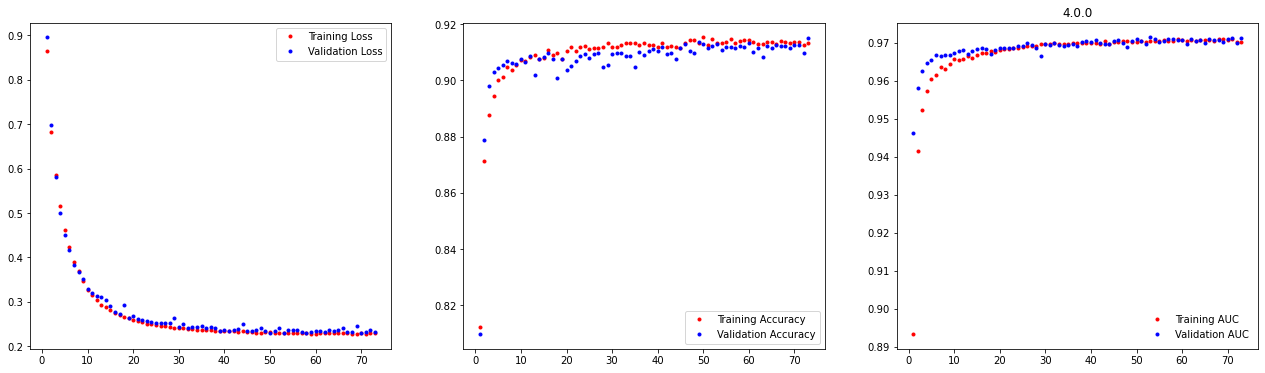

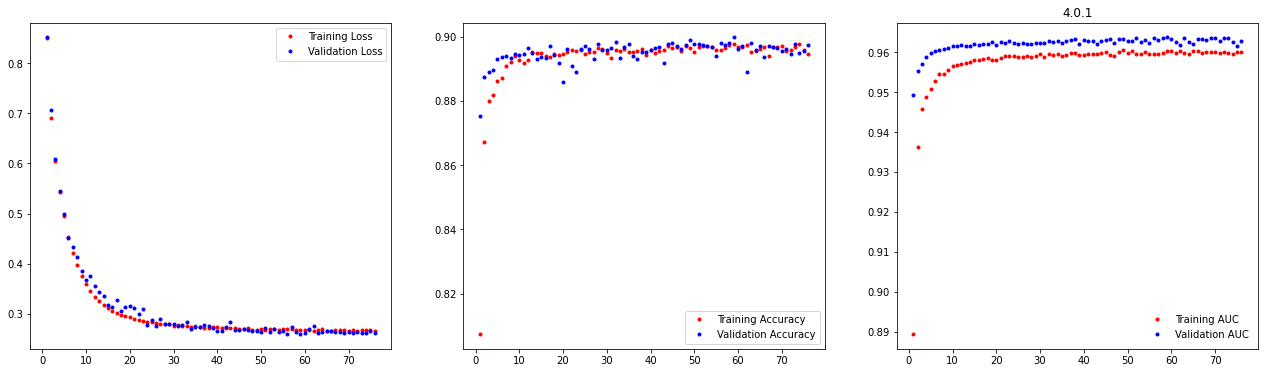

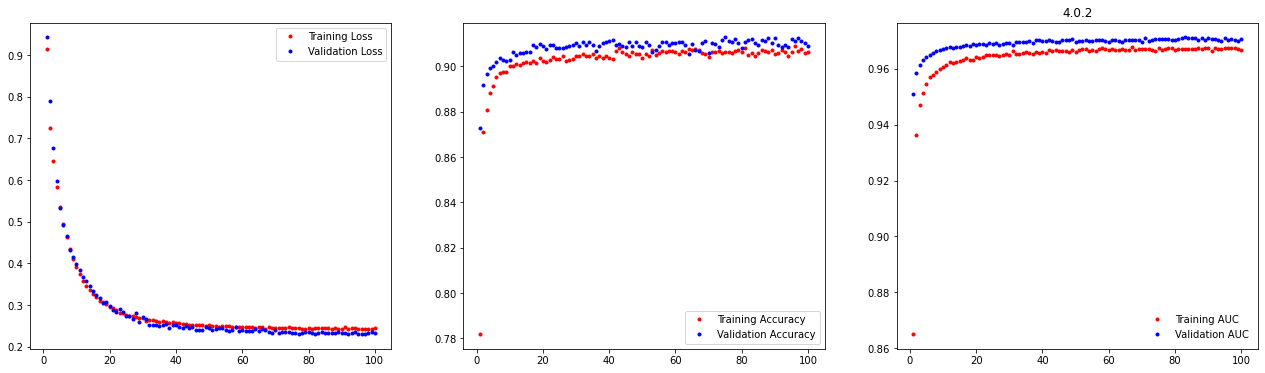

In [32]:
for i, d in enumerate(data):
    plot_history(f'4.0.{i}', f'train_history_imgs/4.1.{i}.png')

In [33]:
history1 = pickle.load(open(f'train_history/v4.1.0', "rb"))
history2 = pickle.load(open(f'train_history/v4.1.1', "rb"))
history3 = pickle.load(open(f'train_history/v4.1.2', "rb"))
acc1, auc1 = history1['binary_accuracy'], history1['auc']
acc2, auc2 = history2['binary_accuracy'], history2['auc']
acc3, auc3 = history3['binary_accuracy'], history3['auc']

max(acc1), max(auc1), max(acc2), max(auc2), max(acc3), max(auc3)

(0.9146665334701538,
 0.9708017706871033,
 0.8985813856124878,
 0.9603811502456665,
 0.9086745381355286,
 0.9674708247184753)